In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing 
from sklearn.feature_selection import chi2
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import xgboost as xgb
import math

In [3]:
data = pd.read_csv('2004-2019.tsv', sep='\t')
data.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,...,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,...,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,...,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,...,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,...,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,...,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [4]:
data.columns

Index(['Unnamed: 0', 'DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO',
       'PRODUTO', 'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO', 'MÊS',
       'ANO'],
      dtype='object')

In [5]:
col_name=['First_Day','Last_Day','Macro','State','product_kind','No_gas_stat','Measure_Unit','Mean_Market','SD','Min_Price','Max_Price','Mean_price','ÇV','Mean_Dist_Price','SD_Dist','Min_Price_Dist','Max_Price_Dist','ÇV_Dist','Month','Ýear']

In [6]:
data=data.drop('Unnamed: 0',1)

In [7]:
data.shape

(106823, 20)

In [8]:
len(col_name)

20

In [9]:
data=data.set_axis(col_name, axis=1, inplace=False)

In [10]:
data.dtypes

First_Day           object
Last_Day            object
Macro               object
State               object
product_kind        object
No_gas_stat          int64
Measure_Unit        object
Mean_Market        float64
SD                 float64
Min_Price          float64
Max_Price          float64
Mean_price          object
ÇV                 float64
Mean_Dist_Price     object
SD_Dist             object
Min_Price_Dist      object
Max_Price_Dist      object
ÇV_Dist             object
Month                int64
Ýear                 int64
dtype: object

Convert Date into day month year and use encoding for columns with datatype object and 2 to 5 unique values can be encoded since those are factors.

In [11]:
data.nunique()

First_Day            785
Last_Day             785
Macro                  5
State                 27
product_kind           6
No_gas_stat         2219
Measure_Unit           3
Mean_Market        18612
SD                  6341
Min_Price           2047
Max_Price           2078
Mean_price         11930
ÇV                   210
Mean_Dist_Price    15997
SD_Dist             5858
Min_Price_Dist     21620
Max_Price_Dist     22576
ÇV_Dist              397
Month                 12
Ýear                  16
dtype: int64

In [12]:
lb_encoded=data.copy()
label_encoder = preprocessing.LabelEncoder() 
lb_encoded['Macro']= label_encoder.fit_transform(lb_encoded['Macro']) 
lb_encoded['product_kind']= label_encoder.fit_transform(lb_encoded['product_kind']) 
lb_encoded['Measure_Unit']= label_encoder.fit_transform(lb_encoded['Measure_Unit']) 
lb_encoded.head()

,First_Day,Last_Day,Macro,State,product_kind,No_gas_stat,Measure_Unit,Mean_Market,SD,Min_Price,Max_Price,Mean_price,ÇV,Mean_Dist_Price,SD_Dist,Min_Price_Dist,Max_Price_Dist,ÇV_Dist,Month,Ýear
0,2004-05-09,2004-05-15,0,DISTRITO FEDERAL,0,127,1,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,0,GOIAS,0,387,1,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,0,MATO GROSSO,0,192,1,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,0,MATO GROSSO DO SUL,0,162,1,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,1,ALAGOAS,0,103,1,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [13]:
datatype=['object']
data_obj= lb_encoded.select_dtypes(include=datatype)
data_obj.head()

,First_Day,Last_Day,State,Mean_price,Mean_Dist_Price,SD_Dist,Min_Price_Dist,Max_Price_Dist,ÇV_Dist
0,2004-05-09,2004-05-15,DISTRITO FEDERAL,0.463,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,GOIAS,0.399,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,MATO GROSSO,0.419,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,MATO GROSSO DO SUL,0.432,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,ALAGOAS,0.24,0.941,0.077,0.7441,1.0317,0.082


In [14]:
lb_encoded.loc[lb_encoded.Mean_price == '-', 'Mean_price'] = 0.0
lb_encoded['Mean_price']=lb_encoded['Mean_price'].astype(float)

lb_encoded.loc[lb_encoded.Mean_Dist_Price == '-', 'Mean_Dist_Price'] = 0.0
lb_encoded['Mean_Dist_Price']=lb_encoded['Mean_Dist_Price'].astype(float)

lb_encoded.loc[lb_encoded.SD_Dist == '-','SD_Dist'] = 0.0
lb_encoded['SD_Dist']=lb_encoded['SD_Dist'].astype(float)

lb_encoded.loc[lb_encoded.Min_Price_Dist == '-', 'Min_Price_Dist'] = 0.0
lb_encoded['Min_Price_Dist']=lb_encoded['Min_Price_Dist'].astype(float)

lb_encoded.loc[lb_encoded.Max_Price_Dist == '-', 'Max_Price_Dist'] = 0.0
lb_encoded['Max_Price_Dist']=lb_encoded['Max_Price_Dist'].astype(float)

lb_encoded.loc[lb_encoded.ÇV_Dist == '-','ÇV_Dist'] = 0.0
lb_encoded['ÇV_Dist']=lb_encoded['ÇV_Dist'].astype(float)


In [15]:
date_split=lb_encoded["First_Day"].str.split("-",n=3,expand= True) 
lb_encoded['fr_day']=date_split[2].astype(int)
lb_encoded['fr_mon']=date_split[1].astype(int)
lb_encoded['fr_year']=date_split[0].astype(int)
lb_encoded=lb_encoded.drop('First_Day',1)
date_split=lb_encoded["Last_Day"].str.split("-",n=3,expand= True) 
lb_encoded['la_day']=date_split[2].astype(int)
lb_encoded['la_mon']=date_split[1].astype(int)
lb_encoded['la_year']=date_split[0].astype(int)
lb_encoded=lb_encoded.drop('Last_Day',1)
lb_encoded.head()

,Macro,State,product_kind,No_gas_stat,Measure_Unit,Mean_Market,SD,Min_Price,Max_Price,Mean_price,...,Max_Price_Dist,ÇV_Dist,Month,Ýear,fr_day,fr_mon,fr_year,la_day,la_mon,la_year
0,0,DISTRITO FEDERAL,0,127,1,1.288,0.016,1.19,1.350,0.463,...,0.96660,0.133,5,2004,9,5,2004,15,5,2004
1,0,GOIAS,0,387,1,1.162,0.114,0.89,1.449,0.399,...,1.05000,0.115,5,2004,9,5,2004,15,5,2004
2,0,MATO GROSSO,0,192,1,1.389,0.097,1.18,1.760,0.419,...,1.16100,0.098,5,2004,9,5,2004,15,5,2004
3,0,MATO GROSSO DO SUL,0,162,1,1.262,0.070,1.09,1.509,0.432,...,1.22242,0.143,5,2004,9,5,2004,15,5,2004
4,1,ALAGOAS,0,103,1,1.181,0.078,1.05,1.400,0.240,...,1.03170,0.082,5,2004,9,5,2004,15,5,2004


In [16]:
data.isnull().sum()

First_Day          0
Last_Day           0
Macro              0
State              0
product_kind       0
No_gas_stat        0
Measure_Unit       0
Mean_Market        0
SD                 0
Min_Price          0
Max_Price          0
Mean_price         0
ÇV                 0
Mean_Dist_Price    0
SD_Dist            0
Min_Price_Dist     0
Max_Price_Dist     0
ÇV_Dist            0
Month              0
Ýear               0
dtype: int64

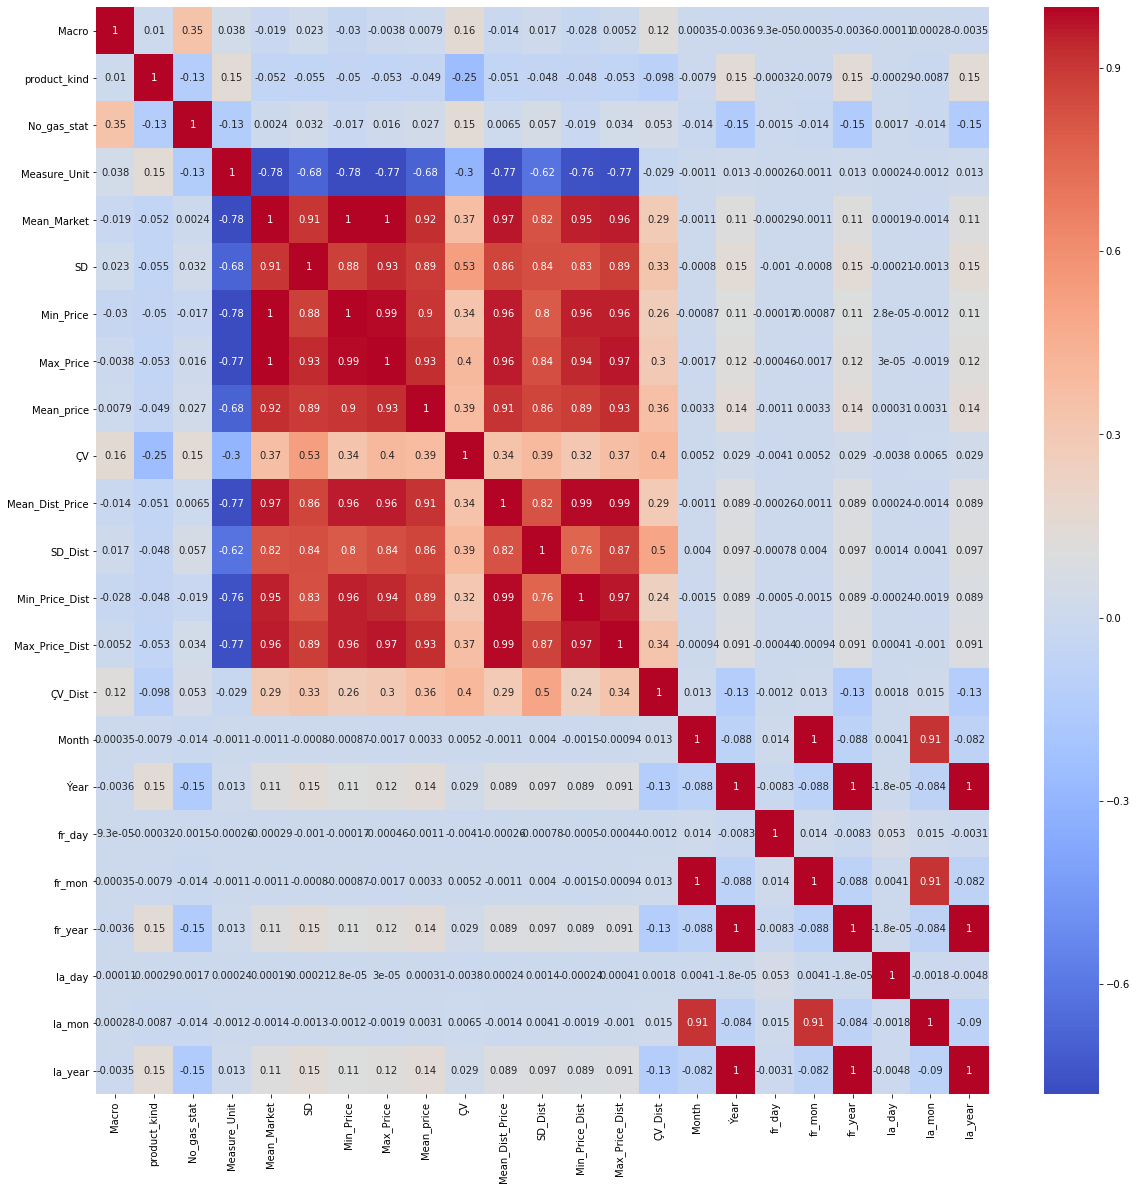

In [17]:
k=lb_encoded.corr()
plt.figure(figsize=(20,20))
sns.heatmap(k,annot=True,cmap="coolwarm")
plt.show()

In [47]:
def metrics_calculations(y_test,y_pred):
    print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
    tn,fp,fn,tp=metrics.confusion_matrix(y_test, y_pred).ravel()
    print("True Negative:",tn)
    print("False Positive:",fp)
    print("False Negative:",fn)
    print("True Positive:",tp)
    print(metrics.classification_report(y_test, y_pred))
    k=metrics.roc_curve(y_test,y_pred)
    #print(k)
    plt.figure()
    lw = 2
    print("Area Under Curve is:",metrics.auc(k[0],k[1]))
    plt.plot(k[0],k[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)'%metrics.auc(k[0],k[1]))
    plt.plot([0, 1], [0, 1],color='navy',lw=lw,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic ROC')
    plt.legend(loc="lower right")
    plt.show()
def random_forest_reg(x_train,y_train,x_test):
    ra=RandomForestRegressor(n_estimators=700)
    ra.fit(x_train,y_train)
    y_pred=ra.predict(x_test)
    return y_pred
def decision_tree_reg(x_train,y_train,x_test):
    dtc=DecisionTreeRegressor()
    dtc=dtc.fit(x_train,y_train)
    y_pred = dtc.predict(x_test)
    return y_pred
def logistic_regression(x_train,y_train,x_test):
    model_log=LogisticRegression()
    model_log.fit(x_train,y_train)
    y_pred=model_log.predict(x_test)
    return y_pred
def knn_reg(x_train,y_train,x_test):
    kvalue=list(lb_encoded.shape)
    kv=int(math.sqrt(kvalue[0]))
    knn = neighbors.KNeighborsRegressor(kv)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    return y_pred
def gridcv(model,parameters,x_train,y_train):
    grid_search = GridSearchCV(estimator = model, param_grid = parameters,scoring ='roc_auc',n_jobs = -1)
    grid_search = grid_search.fit(x_train,y_train)
    print(grid_search.best_score_)
    print(grid_search.best_params_)
    print("")
    print()
def split_train(x1,y1,size):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=size,random_state=0)
    return [x_train,x_test,y_train,y_test]
def k_best(x,y,k):
    bestfeatures = SelectKBest(k=6)
    fit = bestfeatures.fit(x,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(x.columns)
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']
    return featureScores.nlargest(10,'Score')
def metrics_calculations_lin(y_test,y_pred):
    print("RMSE/Root Mean Square Error",math.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print("R2 Score",metrics.r2_score(y_test,y_pred))

In [32]:
x=lb_encoded.iloc[:,[0,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19]]
y=lb_encoded.iloc[:,11]
print(k_best(x,y,15))

              Specs        Score
9   Mean_Dist_Price          inf
12   Max_Price_Dist  1924.642216
11   Min_Price_Dist  1312.866119
7         Max_Price   139.320504
4       Mean_Market   135.021975
6         Min_Price   130.963218
10          SD_Dist   122.080619
5                SD    73.320955
3      Measure_Unit    19.515911
15             Ýear    11.550760


C:\Users\Sam Jones\Anaconda3\envs\Sam_ML\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [50]:
result=split_train(x,y,0.2)
x_train=result[0]
x_test=result[1]
y_train=result[2]
y_test=result[3]
rf_pred=random_forest_reg(x_train,y_train,x_test)
dt_pred=decision_tree_reg(x_train,y_train,x_test)
#lr_pred=logistic_regression(x_train,y_train,x_test)
kn_pred=knn_reg(x_train,y_train,x_test)
print("***********************************************Random Forest:""***********************************************")
metrics_calculations_lin(y_test,rf_pred)
print("***********************************************Decision Tree:""***********************************************")
metrics_calculations_lin(y_test,dt_pred)
#print("***********************************************Logistic Regression""***********************************************")
#metrics_calculations(y_test,lr_pred)
print("***********************************************KNN""***********************************************")
metrics_calculations_lin(y_test,kn_pred)

***********************************************Random Forest:***********************************************
RMSE/Root Mean Square Error 0.023568763458904553
R2 Score 0.9999969348694385
***********************************************Decision Tree:***********************************************
RMSE/Root Mean Square Error 0.02393336998571124
R2 Score 0.9999968393013418
***********************************************KNN***********************************************
RMSE/Root Mean Square Error 2.10634694676933
R2 Score 0.9755186593008361


In [29]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(x, y)
y_pred = xgb_model.predict(x)
metrics_calculations_lin(y,y_pred)

C:\Users\Sam Jones\Anaconda3\envs\Sam_ML\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sam Jones\Anaconda3\envs\Sam_ML\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[19:19:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE/Root Mean Square Error 0.06285854996483603
R2 Score 0.999978219986366
